In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Sahaj's PC\\vois\\gamechanger.csv")
df.head()

,Cleaned sentence,Analysis
0,is upset that he can t update his Facebook by ...,Neutral
1,Kenichan I dived many times for the ball Mana...,Positive
2,my whole body feels itchy and like its on fire,Positive
3,nationwideclass no it s not behaving at all i...,Negative
4,Kwesidei not the whole crew,Positive


In [12]:

table[['sentence']] = df[['Cleaned sentence']]
table[['Analysis']] = df[['Analysis']]
print(table.shape)
table.head(5)

(1599999, 2)


,Analysis,sentence
0,Neutral,is upset that he can t update his Facebook by ...
1,Positive,Kenichan I dived many times for the ball Mana...
2,Positive,my whole body feels itchy and like its on fire
3,Negative,nationwideclass no it s not behaving at all i...
4,Positive,Kwesidei not the whole crew


In [13]:
table["Analysis"].value_counts()

Positive    694858
Neutral     599619
Negative    305522
Name: Analysis, dtype: int64

In [14]:
sentiment_label = table.Analysis.factorize()
sentiment_label

(array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 Index(['Neutral', 'Positive', 'Negative'], dtype='object'))

In [15]:
tweet = table.sentence.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [16]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
print(tweet[0])
print(encoded_docs[0])

is upset that he can t update his Facebook by texting it and might cry as a result School today also Blah 
[9, 800, 17, 88, 30, 13, 556, 190, 524, 127, 2058, 6, 7, 298, 540, 87, 4, 2344, 150, 43, 275, 1151]


In [18]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    9  800   17   88
   30   13  556  190  524  127 2058    6    7  298  540   87    4 2344
  150 

In [19]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           18753792  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 18,770,443
Trainable params: 18,770,443
Non-trainable params: 0
____________________________________________

In [20]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
40000/40000 [==============================] - 11111s 278ms/step - loss: -179.4034 - accuracy: 0.7243 - val_loss: -153.7123 - val_accuracy: 0.8791
Epoch 2/5
40000/40000 [==============================] - 11230s 281ms/step - loss: -536.9855 - accuracy: 0.7291 - val_loss: -307.3626 - val_accuracy: 0.8815
Epoch 3/5
40000/40000 [==============================] - 13454s 336ms/step - loss: -897.4248 - accuracy: 0.7307 - val_loss: -460.3184 - val_accuracy: 0.8819
Epoch 4/5
40000/40000 [==============================] - 11059s 276ms/step - loss: -1257.7739 - accuracy: 0.7334 - val_loss: -617.2015 - val_accuracy: 0.8831
Epoch 5/5
40000/40000 [==============================] - 10528s 263ms/step - loss: -1618.8127 - accuracy: 0.7352 - val_loss: -770.9053 - val_accuracy: 0.8830


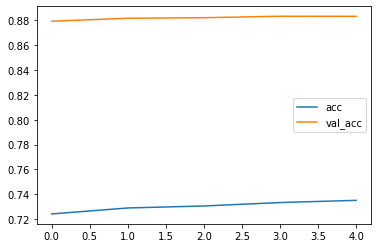

In [21]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


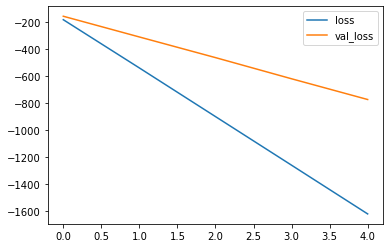

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [23]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [24]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 414ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 25ms/step
Predicted label:  Positive


In [25]:
test_sentence3 = "eat a bag of dicks"
predict_sentiment(test_sentence3)

1/1 [==============================] - 0s 21ms/step
Predicted label:  Neutral


In [26]:
model.save('majormodel.h5')

In [34]:
test_sentence4 = "kill me"
predict_sentiment(test_sentence4)

1/1 [==============================] - 0s 45ms/step
Predicted label:  Neutral
